[170370.0204065]


/home/pramodjaiswal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


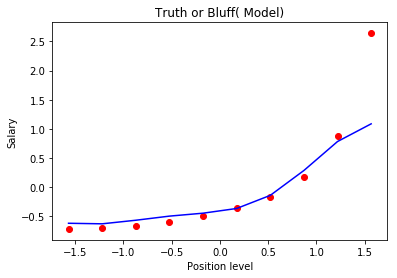

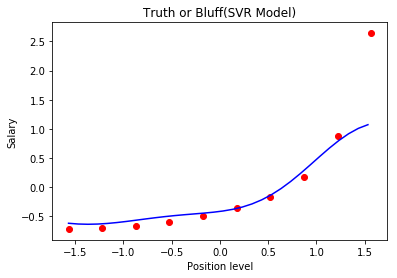

In [28]:
#!/usr/bin/env python
# coding: utf-8
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values    #   X here is matrix and Y is a vector
Y = dataset.iloc[:,2].values

# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
#no testing set for this problem because its very small dataset and we need a effecient solution

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y.reshape((len(Y),1)))

# ## Fitting The Regression to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,Y)

# ## Predicting a new result with SVR Model
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)
# ## Visaulising the SVR Model
plt.scatter(X, Y,color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff( Model)')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

# ## Visaulising the SVR Model(for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, Y,color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff(SVR Model)')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()





